<a href="https://colab.research.google.com/github/RyuMyunggi/NASA-battery-dataset-eda/blob/main/battery_field_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import 

import json

json load complete..
total data length:  168


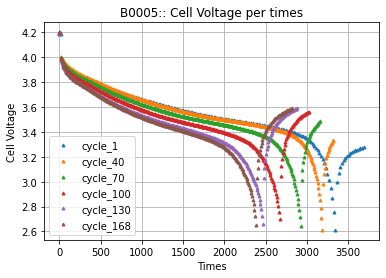

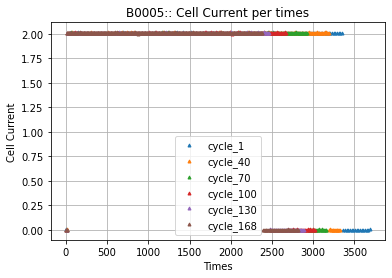

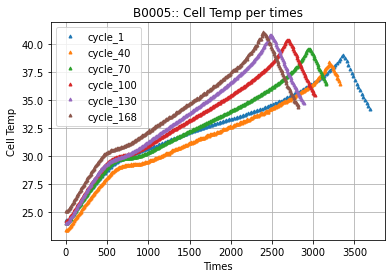

In [12]:
# battery field(voltage, current, temp) trend analysis

def get_selected_cycle_data(battery: str, condition: str):
    file_path = f'/content/drive/MyDrive/NASA-processing-data/{battery}_{condition}.json'
    with open(file_path, 'r') as file:
        json_data = json.load(file)
        print('json load complete..')
        print('total data length: ', len(json_data))

        idx = 0
        res = {}
        for number in json_data:
            idx += 1
            json_data[number].update({'cycle': number})
            json_data[number]['current_battery'] = get_abs_currents(json_data[number]['current_battery'])
            res[str(idx)] = json_data[number]

    return res

def get_abs_currents(currents):
    abs_currents = []
    for current in currents:
        abs_currents.append(abs(current))
    
    return abs_currents

def draw_plot(res: dict, battery: str, target: str, cycles: list):
    target_field, ylabel = get_target_and_ylabel(target)
    if not cycles:
        cycles = [i for i in range(1, len(res) + 1)]
    for cycle in cycles:
        selected_data = res[str(cycle)]
        plt.plot(selected_data['time'], selected_data[target_field], '^', markersize=3, label=f'cycle_{cycle}')
        plt.ylabel(ylabel)
        plt.xlabel('Times')
        plt.title(f'{battery}:: {ylabel} per times')
    plt.legend()
    plt.grid(True)
    plt.show()


def get_target_and_ylabel(target):
    if target == 'v':
        return 'voltage_battery', 'Cell Voltage'
    elif target == 'a':
        return 'current_battery', 'Cell Current'
    elif target == 't':
        return 'temp_battery', 'Cell Temp'


selected_cycles = [1, 40,  70, 100, 130, 168]
data = get_selected_cycle_data('B0005', 'discharge')
draw_plot(data, 'B0005', 'v', selected_cycles)
draw_plot(data, 'B0005', 'a', selected_cycles)
draw_plot(data, 'B0005', 't', selected_cycles)